# Install Requirements

In [1]:
! pip install -r notebook-requirements.txt


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# Running The Tests

In [2]:
! NUM_RUNS=1 bash autotest.sh

running sample-smart-contracts/01-mutant_killing.sol
running sample-smart-contracts/02-simple_mapping.sol
running sample-smart-contracts/03-two_TX_ovf.sol
running sample-smart-contracts/04-simple_condition_checking.sol
running sample-smart-contracts/05-simple_msg_value.sol
running sample-smart-contracts/06-simple_int_overflow.sol
running sample-smart-contracts/07-mapping_sample.sol
running sample-smart-contracts/08-dummy_mono-x.sol
running sample-smart-contracts/09-multi_TX_5.sol
running sample-smart-contracts/10-internal_call.sol
running sample-smart-contracts/11-safe_math.sol
running sample-smart-contracts/12-erc20.sol
running sample-smart-contracts/13-fuzzing.sol
running sample-smart-contracts/14-kill_billy.sol
running sample-smart-contracts/15-math_open_zeppelin.sol
running sample-smart-contracts/16-safe_remote_purchase.sol
running sample-smart-contracts/17-unprotected.sol
running sample-smart-contracts/18-address_book.sol
running sample-smart-contracts/19-hotel_room.sol
running sa

# Running Results Parser

In [3]:
! python results-parser.py > results.csv

# Average Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('results.csv')

# Cleaning
df.rename(columns=lambda x: x.strip(), inplace=True)
df.drop(['Date'], inplace=True, axis=1)
df.sort_values('Smart Contract', inplace=True)

df

,Smart Contract,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s),Heuristic
3,01-mutant_killing.sol [mutant_killing],11,6,12,0.071,floyd_warshall is selected
15,02-simple_mapping.sol [SimpleMapping],18,11,15,0.410,floyd_warshall is selected
12,03-two_TX_ovf.sol [TwoTXOverflow],24,19,20,0.260,floyd_warshall is selected
21,04-simple_condition_checking.sol [falseIf],8,6,9,0.063,floyd_warshall is selected
0,05-simple_msg_value.sol [SimpleMsgValueCheck],19,9,16,0.110,floyd_warshall is selected
2,06-simple_int_overflow.sol [SimpleIntegerOver...,11,15,10,0.180,floyd_warshall is selected
1,07-mapping_sample.sol [mappingSample],12,10,11,0.120,floyd_warshall is selected
20,08-dummy_mono-x.sol [MonoxBug],21,13,17,0.300,floyd_warshall is selected
8,09-multi_TX_5.sol [multi_tx_5],19,884,20,22.000,floyd_warshall is selected
25,10-internal_call.sol [internal_call],21,15,20,0.150,floyd_warshall is selected


In [17]:
avg_df = df

avg_df = avg_df.groupby('Smart Contract', as_index=False).mean(numeric_only=True).round({'Execution Time (s)': 2})
avg_df = avg_df.astype({"#LoC": int, "# Generated Walks": int, "# CFG Nodes": int})

avg_df['id'] = avg_df['Smart Contract'].str[:3].str.strip()
avg_df.set_index('id', inplace=True)
avg_df.index.name = None

avg_df['Smart Contract'] = avg_df['Smart Contract'].str[4:]
avg_df['Smart Contract'] = avg_df['Smart Contract'].str.split(".sol").str[0].str.title().str.replace('_', ' ').str.replace('-', ' ')

avg_df

,Smart Contract,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s)
01,Mutant Killing,11,6,12,0.07
02,Simple Mapping,18,11,15,0.41
03,Two Tx Ovf,24,19,20,0.26
04,Simple Condition Checking,8,6,9,0.06
05,Simple Msg Value,19,9,16,0.11
06,Simple Int Overflow,11,15,10,0.18
07,Mapping Sample,12,10,11,0.12
08,Dummy Mono X,21,13,17,0.30
09,Multi Tx 5,19,884,20,22.00
10,Internal Call,21,15,20,0.15


# Correlation

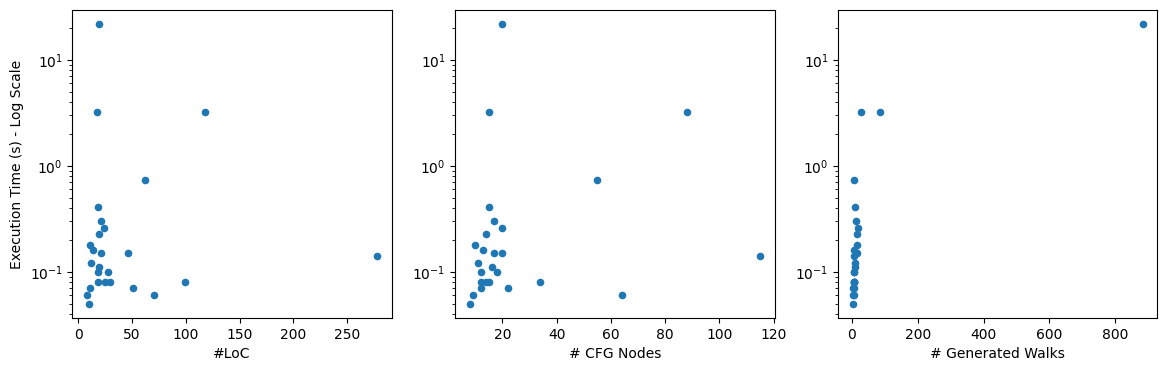

In [18]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

avg_df.plot.scatter(x='#LoC', y='Execution Time (s)', logy=True, ax=axes[0], subplots=True, legend=False)
avg_df.plot.scatter(x='# CFG Nodes', y='Execution Time (s)', logy=True, ax=axes[1], subplots=True, legend=False)
avg_df.plot.scatter(x='# Generated Walks', y='Execution Time (s)', logy=True, ax=axes[2], subplots=True, legend= False)

axes[0].set_ylabel('Execution Time (s) - Log Scale')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

plt.savefig('/tmp/execution-time.png', dpi=300)

plt.show()

In [19]:
avg_df.corr(numeric_only=True, method='pearson').round(2)

,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s)
#LoC,1.00,-0.09,0.92,-0.05
# Generated Walks,-0.09,1.00,-0.05,0.99
# CFG Nodes,0.92,-0.05,1.00,0.02
Execution Time (s),-0.05,0.99,0.02,1.00


In [20]:
avg_df.corr(numeric_only=True, method='kendall').round(2)

,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s)
#LoC,1.00,-0.08,0.77,0.06
# Generated Walks,-0.08,1.00,0.07,0.74
# CFG Nodes,0.77,0.07,1.00,0.23
Execution Time (s),0.06,0.74,0.23,1.00


In [21]:
avg_df.corr(numeric_only=True, method='spearman').round(2)

,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s)
#LoC,1.00,-0.11,0.90,0.11
# Generated Walks,-0.11,1.00,0.05,0.87
# CFG Nodes,0.90,0.05,1.00,0.31
Execution Time (s),0.11,0.87,0.31,1.00


# Generate Latex Table

In [22]:
avg_df.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26'],
      dtype='object')

In [23]:
print(avg_df.drop(index=["14", "21"]).to_latex(index=False, float_format="{:.2f}".format).replace('\\\\', '\\\\ \\hline'))

\begin{tabular}{lrrrr}
\toprule
Smart Contract & #LoC & # Generated Walks & # CFG Nodes & Execution Time (s) \\ \hline
\midrule
Mutant Killing & 11 & 6 & 12 & 0.07 \\ \hline
Simple Mapping & 18 & 11 & 15 & 0.41 \\ \hline
Two Tx Ovf & 24 & 19 & 20 & 0.26 \\ \hline
Simple Condition Checking & 8 & 6 & 9 & 0.06 \\ \hline
Simple Msg Value & 19 & 9 & 16 & 0.11 \\ \hline
Simple Int Overflow & 11 & 15 & 10 & 0.18 \\ \hline
Mapping Sample & 12 & 10 & 11 & 0.12 \\ \hline
Dummy Mono X & 21 & 13 & 17 & 0.30 \\ \hline
Multi Tx 5 & 19 & 884 & 20 & 22.00 \\ \hline
Internal Call & 21 & 15 & 20 & 0.15 \\ \hline
Safe Math & 46 & 13 & 17 & 0.15 \\ \hline
Erc20 & 118 & 28 & 88 & 3.20 \\ \hline
Fuzzing & 14 & 8 & 13 & 0.16 \\ \hline
Math Open Zeppelin & 62 & 8 & 55 & 0.73 \\ \hline
Safe Remote Purchase & 99 & 6 & 34 & 0.08 \\ \hline
Unprotected & 29 & 7 & 14 & 0.08 \\ \hline
Address Book & 10 & 4 & 8 & 0.05 \\ \hline
Hotel Room & 51 & 4 & 22 & 0.07 \\ \hline
Shared Wallet & 28 & 7 & 18 & 0.10 \\ \hline
Str